#### IMPORTING LIBRARIES 

In [46]:
#basic imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#for modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [47]:
df=pd.read_csv("data/cleaned.csv")

In [48]:
df.head()

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [49]:
x=df.drop('total score',axis=1)
y=df['total score']

In [50]:
x.head()

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,1,female,group C,some college,standard,completed,69,90,88,82.333333
2,2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,4,male,group C,some college,standard,none,76,78,75,76.333333


In [51]:
#create column transformer  with 3 types of transformers
num__features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor= ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScalar",numeric_transformer,num__features),
        
    ]
)

In [52]:
x=preprocessor.fit_transform(x)

In [53]:
#separate dataset into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 22), (200, 22))

#### Create an Evaluate function to give all the meterics after model training

In [54]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2=r2_score(true,predicted)
    return mae,rmse,r2

In [55]:
models={
    "Linear Regression" : LinearRegression(), 
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor " : RandomForestRegressor(),
    "Adaboost Regressor" : AdaBoostRegressor(),
    # "CatBoosting Regressor" : CatBoostRegressor(verbose=0),
    "Xgboost Regressor" : XGBRegressor()
}
model_list =[]
r2_list=[]

for i in range(len(list(models))):
    model =list(models.values())[i]
    model.fit(x_train,y_train) #train model

    #make predictions
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    

    #evaluate train and test dataset
    model_train_mae,model_train_rmse,model_train_r2 =evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2 =evaluate_model(y_test,y_test_pred)
     
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2) 


    print("Model performance for trainig set")
    print("root mean squared error : {:.4f}".format(model_train_rmse))
    print("mean absolute error : {:.4f}".format(model_train_mae))
    print(" R2 score : {:.4f}".format(model_train_r2))
    
    print("-"*35)


    print("Model performance for testing set")
    print("root mean squared error : {:.4f}".format(model_test_rmse))
    print("mean absolute error : {:.4f}".format(model_test_mae))
    print(" R2 score : {:.4f}".format(model_test_r2))
    print("="*35)
    print("\n")






Linear Regression
Model performance for trainig set
root mean squared error : 0.0000
mean absolute error : 0.0000
 R2 score : 1.0000
-----------------------------------
Model performance for testing set
root mean squared error : 0.0000
mean absolute error : 0.0000
 R2 score : 1.0000


Lasso
Model performance for trainig set
root mean squared error : 1.0090
mean absolute error : 0.8075
 R2 score : 0.9994
-----------------------------------
Model performance for testing set
root mean squared error : 1.0557
mean absolute error : 0.8312
 R2 score : 0.9994


Ridge
Model performance for trainig set
root mean squared error : 0.0176
mean absolute error : 0.0143
 R2 score : 1.0000
-----------------------------------
Model performance for testing set
root mean squared error : 0.0194
mean absolute error : 0.0147
 R2 score : 1.0000


K-Neighbors Regressor
Model performance for trainig set
root mean squared error : 6.4104
mean absolute error : 4.9430
 R2 score : 0.9771
-----------------------------

#### RESULTS

In [56]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model name","R2_Score"]).sort_values(by=["R2_Score"],ascending=False)

,Model name,R2_Score
0,Linear Regression,1.000000
2,Ridge,1.000000
1,Lasso,0.999422
4,Decision Tree,0.997525
7,Xgboost Regressor,0.997360
5,Random Forest Regressor,0.995409
6,Adaboost Regressor,0.991596
3,K-Neighbors Regressor,0.961409


#### LINEAR REGRESSION

In [57]:
linear_model=LinearRegression(fit_intercept=True)
linear_model=linear_model.fit(x_train,y_train)
y_pred=linear_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("accuracy of model is %0.2f" %score)



accuracy of model is 100.00


#### PLOT : y_pred vs y_test

Text(0.5, 1.0, 'Actual vs Predicted Values')

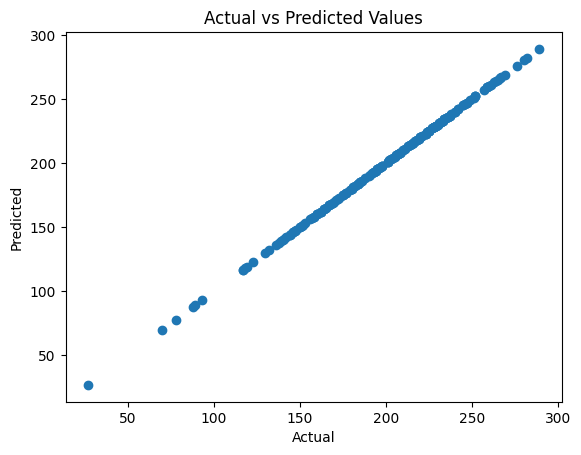

In [60]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Actual vs Predicted Values")


##### Difference Between Actual and Predicted Values

In [59]:
pred_df=pd.DataFrame({'ACtaual value':y_test,'Predicted value':y_pred,'Difference': y_test-y_pred})
pred_df

,ACtaual value,Predicted value,Difference
521,261,261.0,0.000000e+00
737,192,192.0,0.000000e+00
740,225,225.0,2.842171e-14
660,224,224.0,-2.842171e-14
411,245,245.0,2.842171e-14
...,...,...,...
408,165,165.0,-5.684342e-14
332,171,171.0,0.000000e+00
208,231,231.0,0.000000e+00
613,216,216.0,5.684342e-14
